In [2]:
import sys
sys.path.insert(0, '../../utils')
import pandas as pd
import Purity_Measure as pm
import Concurrence_Measure as cm
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
purity_list = []
concurrence_list = []
# alpha_values = ['HS-Haar', 0.8, 0.3, 0.1, 'Z']#np.round(np.arange(0.1, 1., 0.1), 2)
# alpha_values = ['Engineered', 'HS-Haar', 'Z', 0.8, 0.3, 0.1, 0.01, 'HS', 'Bures'] #np.round(np.arange(0.1, 1., 0.1), 2)
# alpha_values = ['HS_Haar', 'Bures', 'Z_IBMQMIN', '0.3394171312620001_k_params_6_filtered', '0.3394171312620001_k_params_6_no_truncation']
alpha_values = ['Engineered', 'HS-Haar', 'Z', '0.3394171312620001_k_params_6_no_truncation', 'HS', 'Bures']
for alpha in alpha_values:
    # print(alpha)
    if alpha == 'HS-Haar':
        tomo, tau, dm = pd.read_pickle('../../data/HS_Haar_tomo_tau_dm_30000_qs_2.pickle')
    elif alpha == 'Z':
        tomo, tau, dm = pd.read_pickle('../../data/Brian_tomo_tau_dm_50K_point_IBMQMIN.pickle')
    elif alpha == 'Engineered':
        con_list, pur_list = pd.read_pickle(f'../../brute_force_distro_gen/plots/con_list_pur_list_choice_k_fit.pickle')

        purity_list.append(pur_list)
        concurrence_list.append(con_list)
        pur_list = np.array(pur_list[2])
        con_list = np.array(con_list[2])
        print('alpha: ', alpha)
        print('mean purity', pur_list.mean())
        print('P_min', pur_list.min())
        print('P_max', pur_list.max())
        print('C_min', con_list.min())
        print('C_max', con_list.max())
    elif alpha == 'HS':
        tomo, tau, dm = pd.read_pickle('../../data/HS_tomo_tau_dm_30000_qs_2.pickle')
    elif alpha == 'Bures':
        tomo, tau, dm = pd.read_pickle('../../data/Bures_tomo_tau_dm_30000_qs_2.pickle')
    else:
        # tomo, tau, dm = pd.read_pickle(f'../../data/MA_tomo_tau_dm_30000_qs_2_alpha_{alpha}.pickle')
        tomo, tau, dm = pd.read_pickle(f'../../data/Pool_MA_tomo_tau_dm_30000_qs_2_asymmetric_alpha_{alpha}.pickle')

        print(dm.shape)
    try:
        purity = pm.purity(dm)
        purity_list.append(purity)
        conc = cm.concurrence(dm)
        concurrence_list.append(conc)
        mean_purity = tf.math.reduce_mean(purity)
        print('alpha: ', alpha)
        print('mean purity', mean_purity)
        print('P_min', purity.min())
        print('P_max', purity.max())
        print('C_min', conc.min())
        print('C_max', conc.max())
    except:
        pass

alpha:  HS-Haar
mean purity tf.Tensor(0.573237662176368, shape=(), dtype=float64)
P_min 0.28763208665250606
P_max 0.9998878298924636
C_min 0.0
C_max 0.9774558377743765
alpha:  Z
mean purity tf.Tensor(0.6796140629180798, shape=(), dtype=float64)
P_min 0.2516397180900519
P_max 0.9999999085671667
C_min 0.0
C_max 0.9989877248544085
(30000, 4, 4)
alpha:  0.3394171312620001_k_params_6_no_truncation
mean purity tf.Tensor(0.5808975802782075, shape=(), dtype=float64)
P_min 0.2985229712316707
P_max 0.9975327260611783
C_min 0.0
C_max 0.956996509017879
alpha:  HS
mean purity tf.Tensor(0.4711616469064556, shape=(), dtype=float64)
P_min 0.3028877522318333
P_max 0.8467710641607942
C_min 0.0
C_max 0.6770495578923589
alpha:  Bures
mean purity tf.Tensor(0.5623264441960999, shape=(), dtype=float64)
P_min 0.299791214528441
P_max 0.956857630380767
C_min 0.0
C_max 0.9011874727893497
alpha:  Engineered
mean purity 0.7725246201826561
P_min 0.6760832618093636
P_max 0.9601424209538048
C_min 9.477798696588824e-0

Engineered


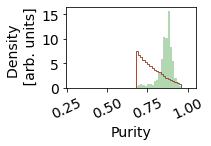

HS-Haar


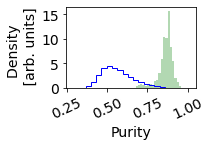

Z


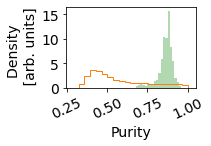

0.3394171312620001_k_params_6_no_truncation


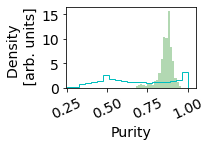

HS


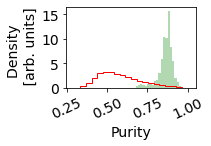

Bures


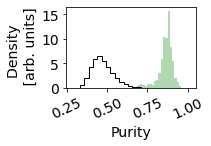

In [5]:
tomo_test, dm_test, dm_mle = pd.read_pickle(f'../../../IBMQ/test_data/testdata_qubit_size_2.pkl')
con = cm.concurrence(dm_mle)
purity = pm.purity(dm_mle)
purity = purity
# print (purity)

fs = 14
# print(purity_list)
# colors = ['b', 'c', 'm', 'y', 'orange'] ['Engineered', 'HS-Haar', 'Z', '0.3394171312620001_k_params_6_no_truncation', 'HS', 'Bures']
colors = ['tab:brown','b', 'tab:orange','c', 'r', 'k', 'm', 'r', 'k']
for i in range(len(alpha_values)):
    print (alpha_values[i])
    if alpha_values[i] == 'Engineered':
        plt.hist(purity_list[i][2], 20, density=True, histtype='step', alpha=1, color=colors[i])#, label=f'{alpha_values[i]}')
    if alpha_values[i] == 'HS-Haar':
        plt.hist(purity_list[i], 20, density=True, histtype='step', alpha=1, color=colors[i])#, label=f'{alpha_values[i]}')
    if alpha_values[i] == 'Z':
        plt.hist(purity_list[i], 20, density=True, histtype='step', alpha=1, color=colors[i])#, label=f'{alpha_values[i]}')
    try:
        if alpha_values[i] < 1.0:
            plt.hist(purity_list[i], 20, density=True, histtype='step', alpha=1,
                     color=colors[i])  # , label=f'{alpha_values[i]}')
    except:
        pass
    if alpha_values[i] == 'HS':
        plt.hist(purity_list[i], 20, density=True, histtype='step', alpha=1,
                 color=colors[i])  # , label=f'{alpha_values[i]}')
    if alpha_values[i] == 'Bures':
        plt.hist(purity_list[i], 20, density=True, histtype='step', alpha=1,
                 color=colors[i])  # , label=f'{alpha_values[i]}')

    if alpha_values[i] == '0.3394171312620001_k_params_6_no_truncation':
        plt.hist(purity_list[i], 20, density=True, histtype='step', alpha=1,
                 color=colors[i])  # , label=f'{alpha_values[i]}')

    # else:
    #     plt.hist(purity_list[i], 20, density=True, histtype='step', alpha=1, color=colors[i], label='MA')
    plt.hist(purity, 20, density=True, color='g', alpha=.3) #, label='IBM Q')
    plt.xlabel('Purity', fontsize=fs)
    plt.xticks(np.arange(0.25, 1.1, 0.25), fontsize=fs, rotation=25)
    plt.yticks(fontsize=fs)
    plt.ylabel('Density \n [arb. units]', fontsize=fs)
    plt.xlim([0.245, 1.05])
    # plt.axis([0.25, 1.02, 0, 16])
    # plt.legend(fontsize='small')
    # plt.grid(alpha=0.2)
    plt.subplots_adjust(bottom=0.6, left=0.6)
    # plt.savefig(f'histo_alpha_{alpha_values[i]}_purity.svg', dpi=600)
    # plt.savefig('histo_alpha.png', dpi=600)
    plt.show()